# K-Means Clustering Algorithm
## Program to Show K-Means Clustering Algorithm

In [39]:
import numpy as np
import pylab as pl
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
np.random.seed(333)

In [41]:
random_1 = np.random.randn(2,100)

In [42]:
random_1.shape

(2, 100)

In [43]:
random_2 = np.random.randn(2,100) + 2

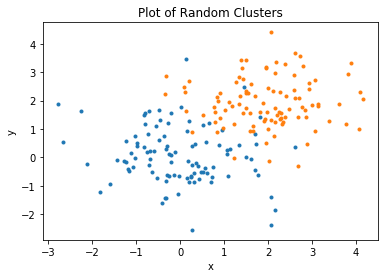

In [44]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');
pl.title("Plot of Random Clusters");


### Fig.1  
This Plot shows two randomly generated clusters 

# 1. chose the number of clusters 
nclusters = 2

In [45]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [46]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

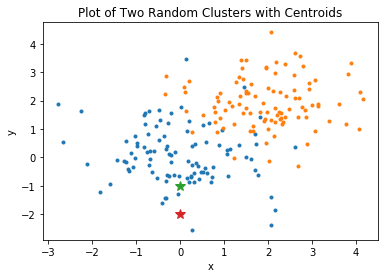

In [47]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');
pl.title("Plot of Two Random Clusters with Centroids");


### Fig.2  
This Plot shows two randomly generated clusters with their random centroids 

In [48]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [49]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])


# 4. calculate new centers

In [50]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

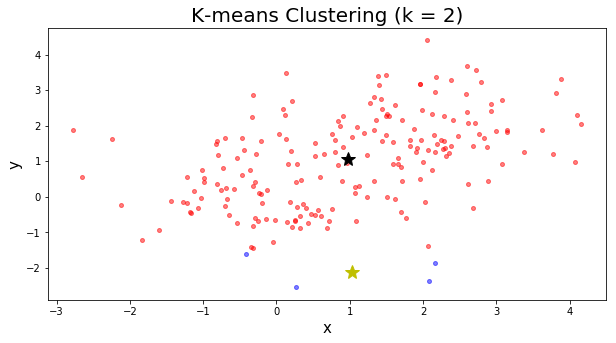

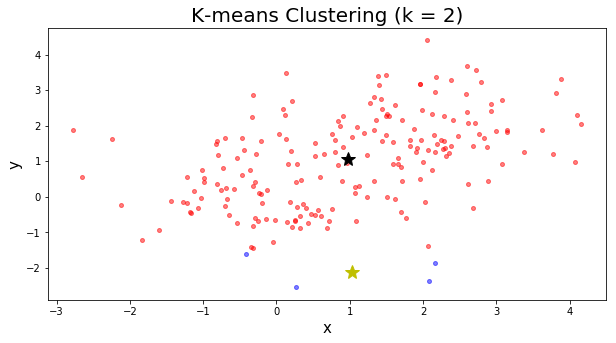

array([ 0.96972306,  1.06522176])

In [53]:
steps = 0

fig, ax = pl.subplots(figsize=(10,5))

f1 = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                      np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.', ms=8, alpha=0.5)
f2 = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.', ms=8, alpha=0.5)
f3 = ax.plot(centers[0,0], centers[0,1], 'k*', ms=15)
f4 = ax.plot(centers[1,0], centers[1,1], 'y*', ms=15)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('K-means Clustering (k = 2)', fontsize=20)

time.sleep(1)
clear_output(wait=True)
display(fig)

while (not (centers == newc).all()) or steps > 10:
    centers = newc
    
    f1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0], 
                  np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])
    f2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0], 
                      np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    f3.set_data(centers[0,0], centers[0,1])
    f4.set_data(centers[1,0], centers[1,1])
    
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
    
    cl1 = dist(random_1[0], random_1[1], centers[0]) < dist(random_1[0], random_1[1], centers[1])
    cl2 = dist(sample2[0], random_2[1], centers[0]) < dist(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
                     np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print(steps)
    print (centers, newc)
    steps += 1

pl.show()
newc[0]

## Fig.3
Centers of the clusters identified using K-Means Algorithm